# Salinity QC example

Example of Salinity QC from Fram Strait 2022 cruise 

In this case, we load the following

- A log sample log sheet for the entire cruise: `CTDlog_FS2022.xlsx`
- Digitized salinometer readings: `salinometer_readings_FS2022.xlsx`
- CTD bottle files: `00X.btl` (we only prescribe the directory where all the `.btl` files are located)

We combine the source data into a single Dataset `ds_btl` and produce some standard plots useful for Salinity QC diagnosis.

In [1]:
from naust import salts # Import the naust.salts module
# Set the backend if you want to interactively modify plots (zoom, move around etc):
#%matplotlib widget 

### Locations of input files

In [2]:
# Define test data paths (FS data)
basedir = '../../../tests/test_data/salts/fs22/'
salinometer_sheet = basedir + 'salts/salinometer_readings_FS2022.xlsx'
ctd_log_sheet = basedir + 'salts/CTDlog_FS2022.xlsx'
btl_dir = basedir + 'btl/'

### Combine input files into a single xarray Dataset

In [3]:
ds_sal = salts.build_salts_qc_dataset(ctd_log_sheet, salinometer_sheet, btl_dir)

Found 22 .btl files in "../../../tests/test_data/salts/fs22/btl".
Loaded 22 profiles from list of Datasets.


Joining profiles together:   0%|          | 0/22 [00:00<?, ?it/s]

Look around in the file by executing `ds_sal`

In [4]:
# ds_sal

## Diagnosis plots

As an example, we will produce some useful plots for secondary salinity (´PSAL2`) with a minimum pressure 500 dbar. 

### Show an overall histogram of lab-CTD differences

Button(description='Close', layout=Layout(width='150px'), style=ButtonStyle())

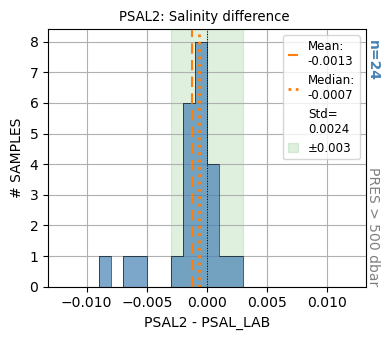

In [5]:
salts.plot_salinity_diff_histogram(ds_sal, 'PSAL2', min_pres=500)

### Plot salinity values and differences by sample

A bit more of a detailed look. Useful to look for trends, to see if partiocular stations stand out, etc. 

Button(description='Close', layout=Layout(width='200px'), style=ButtonStyle())

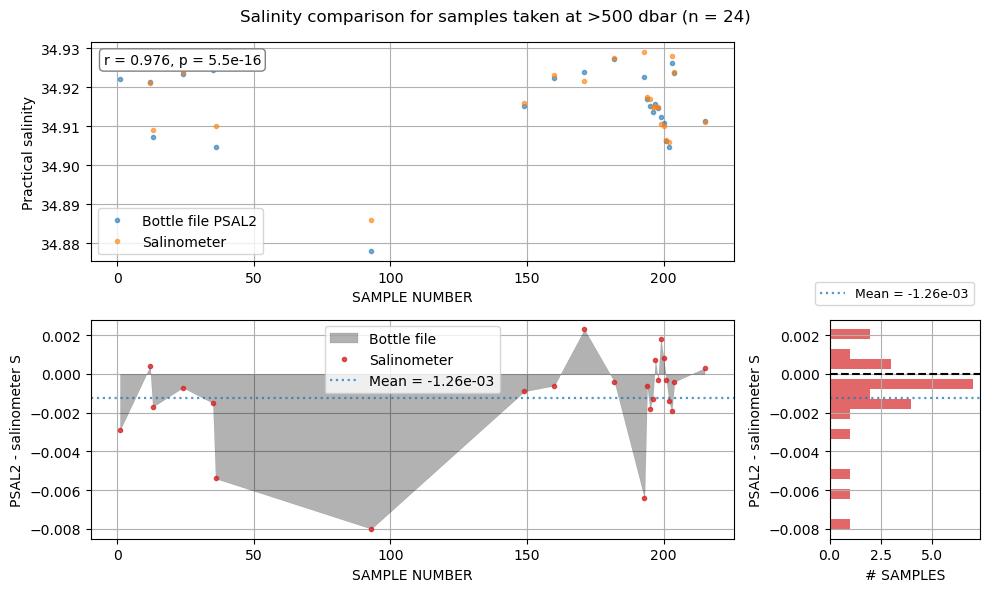

In [6]:
salts.plot_by_sample(ds_sal, 'PSAL2', min_pres=500)

## Scatter plot

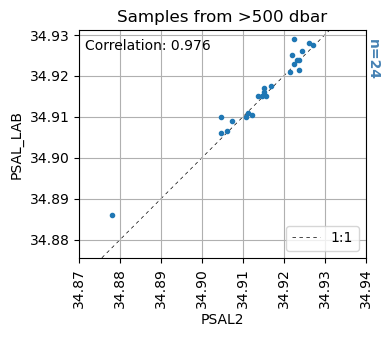

In [7]:
salts.plot_scatter(ds_sal, 'PSAL2', min_pres=500)